In [ ]:
import numpy as np 
import pandas as pd 
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "drive/My Drive/Datasets/crime-dataset.zip"

Archive:  drive/My Drive/Datasets/crime-dataset.zip
   creating: sf-crime/
  inflating: sf-crime/sampleSubmission.csv  
  inflating: sf-crime/test.csv       
  inflating: sf-crime/train.csv      


**1. DATA LOAD**

In [ ]:
train = pd.read_csv('sf-crime/train.csv')
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [ ]:
test = pd.read_csv('sf-crime/test.csv')
test.head()


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [ ]:
sub = pd.read_csv('sf-crime/sampleSubmission.csv')
sub.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
train.shape

(878049, 9)

In [ ]:
test.shape

(884262, 7)

In [ ]:
sub.shape

(884262, 40)

In [ ]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


**2. DATA EDA**

In [ ]:
train["Dates"] = pd.to_datetime(train["Dates"])
train["YEAR"] = train["Dates"].dt.year
train["MONTH"] = train["Dates"].dt.month
train["DAY"] = train["Dates"].dt.day
train["HOUR"] = train["Dates"].dt.hour

test["Dates"] = pd.to_datetime(test["Dates"])
test["YEAR"] = test["Dates"].dt.year
test["MONTH"] = test["Dates"].dt.month
test["DAY"] = test["Dates"].dt.day
test["HOUR"] = test["Dates"].dt.hour

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
 9   YEAR        878049 non-null  int64         
 10  MONTH       878049 non-null  int64         
 11  DAY         878049 non-null  int64         
 12  HOUR        878049 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 87.1+ MB


In [ ]:
train = train.astype({'Category' : 'category', 
                      'DayOfWeek' : 'string', 
                      'PdDistrict': 'string',
                      'Resolution' : 'string',
                      'Address' : 'string'})
train.dtypes

Dates         datetime64[ns]
Category            category
Descript              object
DayOfWeek             string
PdDistrict            string
Resolution            string
Address               string
X                    float64
Y                    float64
YEAR                   int64
MONTH                  int64
DAY                    int64
HOUR                   int64
dtype: object

In [ ]:
test = test.astype({'DayOfWeek' : 'string', 
                    'PdDistrict': 'string',
                    'Address' : 'string'})
test.dtypes

Id                     int64
Dates         datetime64[ns]
DayOfWeek             string
PdDistrict            string
Address               string
X                    float64
Y                    float64
YEAR                   int64
MONTH                  int64
DAY                    int64
HOUR                   int64
dtype: object

([<matplotlib.axis.XTick at 0x7f4a2334ad10>,
 [Text(0, 0, 'LARCENY/THEFT'),
  Text(0, 0, 'OTHER OFFENSES'),
  Text(0, 0, 'NON-CRIMINAL'),
  Text(0, 0, 'ASSAULT'),
  Text(0, 0, 'DRUG/NARCOTIC'),
  Text(0, 0, 'VEHICLE THEFT'),
  Text(0, 0, 'VANDALISM'),
  Text(0, 0, 'WARRANTS'),
  Text(0, 0, 'BURGLARY'),
  Text(0, 0, 'SUSPICIOUS OCC'),
  Text(0, 0, 'MISSING PERSON'),
  Text(0, 0, 'ROBBERY'),
  Text(0, 0, 'FRAUD'),
  Text(0, 0, 'FORGERY/COUNTERFEITING'),
  Text(0, 0, 'SECONDARY CODES'),
  Text(0, 0, 'WEAPON LAWS'),
  Text(0, 0, 'PROSTITUTION'),
  Text(0, 0, 'TRESPASS'),
  Text(0, 0, 'STOLEN PROPERTY'),
  Text(0, 0, 'SEX OFFENSES FORCIBLE'),
  Text(0, 0, 'DISORDERLY CONDUCT'),
  Text(0, 0, 'DRUNKENNESS'),
  Text(0, 0, 'RECOVERED VEHICLE'),
  Text(0, 0, 'KIDNAPPING'),
  Text(0, 0, 'DRIVING UNDER THE INFLUENCE'),
  Text(0, 0, 'RUNAWAY'),
  Text(0, 0, 'LIQUOR LAWS'),
  Text(0, 0, 'ARSON'),
  Text(0, 0, 'LOITERING'),
  Text(0, 0, 'EMBEZZLEMENT'),
  Text(0, 0, 'SUICIDE'),
  Text(0, 0, 'FAMILY O

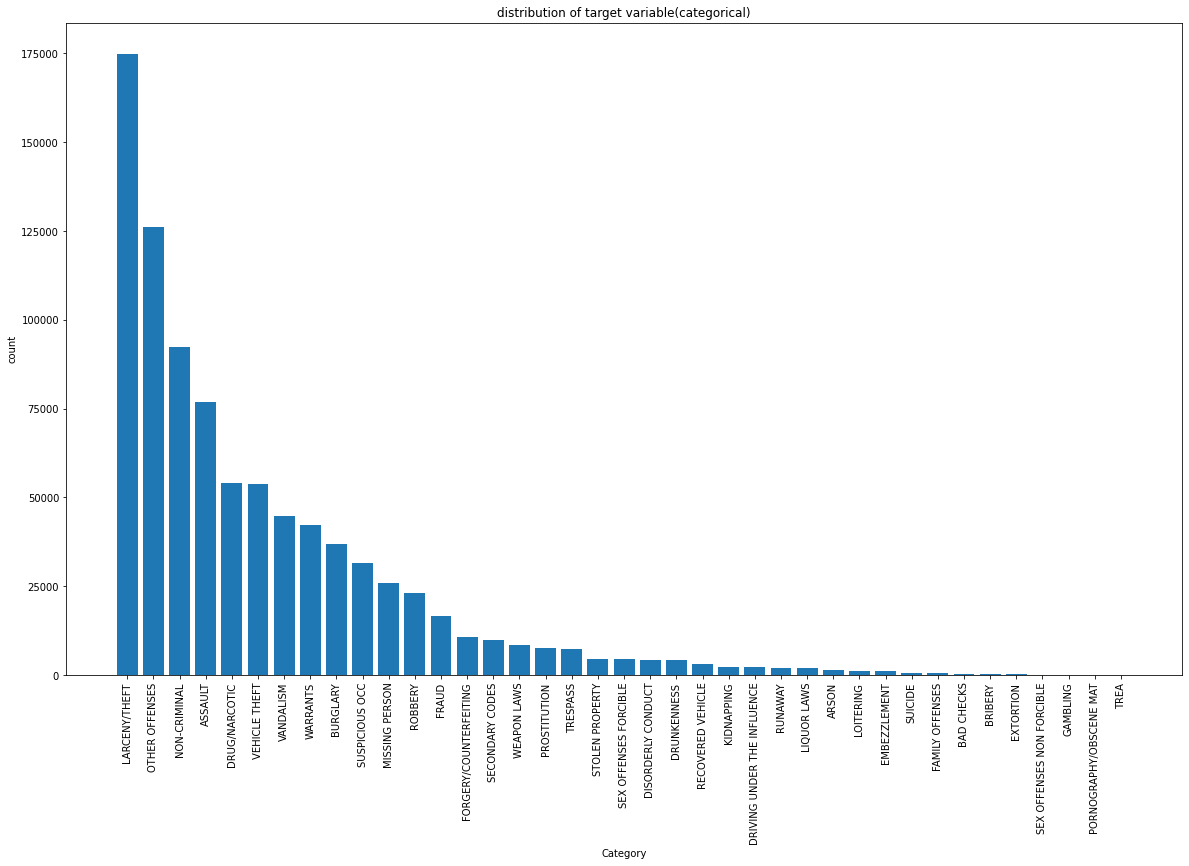

In [ ]:
# target variable
import matplotlib.pyplot as plt
# import seaborn as sns

TARGET = train['Category']
DF_ = TARGET.value_counts()
len_x = np.arange(len(DF_))

plt.figure(figsize = (20, 12))
plt.bar(len_x, DF_)
plt.title("distribution of target variable(categorical)")
plt.ylabel('count')
plt.xlabel('Category')
plt.xticks(range(0, len(DF_.index)), DF_.index, rotation = "vertical")


In [ ]:
DF_

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

**2 random forest**

In [ ]:
train_x = train[['DayOfWeek', 'PdDistrict', 'Address', 
                 'X', 'Y', 'YEAR', 'MONTH', 'DAY', 'HOUR']]
train_y = train[['Category']]

test_x = test[['DayOfWeek', 'PdDistrict', 'Address', 
                 'X', 'Y', 'YEAR', 'MONTH', 'DAY', 'HOUR']]



train_x.head()

,DayOfWeek,PdDistrict,Address,X,Y,YEAR,MONTH,DAY,HOUR
0,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
1,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
2,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23
3,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23
4,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23


In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DayOfWeek   878049 non-null  string 
 1   PdDistrict  878049 non-null  string 
 2   Address     878049 non-null  string 
 3   X           878049 non-null  float64
 4   Y           878049 non-null  float64
 5   YEAR        878049 non-null  int64  
 6   MONTH       878049 non-null  int64  
 7   DAY         878049 non-null  int64  
 8   HOUR        878049 non-null  int64  
dtypes: float64(2), int64(4), string(3)
memory usage: 60.3 MB


In [ ]:
train_y.head()

,Category
0,WARRANTS
1,OTHER OFFENSES
2,OTHER OFFENSES
3,LARCENY/THEFT
4,LARCENY/THEFT


In [ ]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

le = preprocessing.LabelEncoder()

train_x["DayOfWeek"] = le.fit_transform(train_x["DayOfWeek"])
train_x["PdDistrict"] = le.fit_transform(train_x["PdDistrict"])
train_x["Address"] = le.fit_transform(train_x["Address"])

test_x["DayOfWeek"] = le.fit_transform(test_x["DayOfWeek"])
test_x["PdDistrict"] = le.fit_transform(test_x["PdDistrict"])
test_x["Address"] = le.fit_transform(test_x["Address"])

In [ ]:
model = RandomForestClassifier(n_estimators = 20, 
                             max_depth = 5, random_state = 0)
trainedModel = model.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Save model file
import joblib

joblib.dump(trainedModel, "crime_model.joblib")

['crime_model.joblib']

In [ ]:
test_x.iloc[0]

DayOfWeek        3.000000
PdDistrict       0.000000
Address       6407.000000
X             -122.399588
Y               37.735051
YEAR          2015.000000
MONTH            5.000000
DAY             10.000000
HOUR            23.000000
Name: 0, dtype: float64

In [ ]:
test_x.head()

,DayOfWeek,PdDistrict,Address,X,Y,YEAR,MONTH,DAY,HOUR
0,3,0,6407,-122.399588,37.735051,2015,5,10,23
1,3,0,9744,-122.391523,37.732432,2015,5,10,23
2,3,4,6336,-122.426002,37.792212,2015,5,10,23
3,3,2,10633,-122.437394,37.721412,2015,5,10,23
4,3,2,10633,-122.437394,37.721412,2015,5,10,23


In [ ]:
result = trainedModel.predict(test_x)

In [ ]:
print(test_x)

        DayOfWeek  PdDistrict  Address           X          Y  YEAR  MONTH  \
0               3           0     6407 -122.399588  37.735051  2015      5   
1               3           0     9744 -122.391523  37.732432  2015      5   
2               3           4     6336 -122.426002  37.792212  2015      5   
3               3           2    10633 -122.437394  37.721412  2015      5   
4               3           2    10633 -122.437394  37.721412  2015      5   
...           ...         ...      ...         ...        ...   ...    ...   
884257          6           3     7663 -122.408983  37.751987  2003      1   
884258          6           4     5411 -122.425342  37.792681  2003      1   
884259          6           2    11240 -122.445418  37.712075  2003      1   
884260          6           0     4231 -122.387394  37.739479  2003      1   
884261          6           8     4313 -122.489714  37.733950  2003      1   

        DAY  HOUR  
0        10    23  
1        10    23  
2  

In [ ]:
print(result[0])

OTHER OFFENSES


In [ ]:
predictions = trainedModel.predict_proba(test_x)

In [ ]:
predictions

array([[0.00320192, 0.12138433, 0.00028981, ..., 0.08368346, 0.04324645,
        0.01847034],
       [0.00338819, 0.12275365, 0.00029489, ..., 0.08052916, 0.04422286,
        0.01893344],
       [0.00142812, 0.07408403, 0.0004947 , ..., 0.05679458, 0.0316665 ,
        0.00600634],
       ...,
       [0.00291919, 0.10405836, 0.00076328, ..., 0.12741834, 0.03415919,
        0.01046015],
       [0.00366372, 0.11486098, 0.00059147, ..., 0.09811242, 0.04957649,
        0.01567282],
       [0.00237658, 0.09607429, 0.00085675, ..., 0.12320744, 0.03169755,
        0.0084926 ]])

In [ ]:
predictions.shape

(884262, 39)

In [ ]:
np.linspace(0, 38, 39, dtype='int16')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38], dtype=int16)

In [ ]:
sub_length = le.inverse_transform(np.linspace(0, 38, 39, dtype='int16'))
sub_length

array(['0 Block of 10TH ST', '0 Block of 11TH ST', '0 Block of 12TH AV',
       '0 Block of 12TH ST', '0 Block of 13TH ST', '0 Block of 14TH AV',
       '0 Block of 14TH ST', '0 Block of 15TH AV', '0 Block of 15TH ST',
       '0 Block of 16TH AV', '0 Block of 17TH AV', '0 Block of 18TH AV',
       '0 Block of 19TH AV', '0 Block of 1ST ST', '0 Block of 20TH AV',
       '0 Block of 21ST AV', '0 Block of 22ND AV', '0 Block of 25TH AV',
       '0 Block of 26TH AV', '0 Block of 27TH AV', '0 Block of 27TH ST',
       '0 Block of 28TH ST', '0 Block of 29TH ST', '0 Block of 2ND AV',
       '0 Block of 2ND ST', '0 Block of 30TH ST', '0 Block of 36TH AV',
       '0 Block of 3RD AV', '0 Block of 3RD ST', '0 Block of 4TH ST',
       '0 Block of 5TH AV', '0 Block of 5TH ST',
       '0 Block of 5THSTNORTH ST', '0 Block of 6TH AV',
       '0 Block of 6TH ST', '0 Block of 7TH AV', '0 Block of 7TH ST',
       '0 Block of 7THSTNORTH ST', '0 Block of 8TH AV'], dtype=object)

In [ ]:
train_y['Category'].unique()

['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT', 'VANDALISM', ..., 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT']
Length: 39
Categories (39, object): ['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', ..., 'VANDALISM',
                          'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']

In [ ]:
sub.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
len(predictions[0])

39

In [ ]:
sub.iloc[:,1:] = predictions

In [ ]:
sub.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0.003202,0.121384,0.000290,0.000727,0.042625,0.003965,0.002501,0.042942,0.004954,...,0.000301,0.004519,0.000682,0.042755,0.000031,0.007559,0.067867,0.083683,0.043246,0.018470
1,1,0.003388,0.122754,0.000295,0.000749,0.042995,0.003886,0.002409,0.044821,0.004809,...,0.000300,0.004501,0.000678,0.043424,0.000031,0.007668,0.067221,0.080529,0.044223,0.018933
2,2,0.001428,0.074084,0.000495,0.000211,0.074512,0.002931,0.001586,0.027965,0.004166,...,0.000099,0.006966,0.000769,0.036440,0.000005,0.008773,0.058634,0.056795,0.031667,0.006006
3,3,0.002138,0.103176,0.000286,0.000538,0.048149,0.003130,0.002573,0.034347,0.004456,...,0.000264,0.004515,0.000765,0.039693,0.000008,0.006076,0.074803,0.099242,0.032634,0.012251
4,4,0.002138,0.103176,0.000286,0.000538,0.048149,0.003130,0.002573,0.034347,0.004456,...,0.000264,0.004515,0.000765,0.039693,0.000008,0.006076,0.074803,0.099242,0.032634,0.012251


In [ ]:
sub.to_csv('sub1.csv', index = False)

In [ ]:
#=============== Prediction ===============
import joblib

loaded_rf = joblib.load("crime_model.joblib")

In [ ]:
lst = [[3,0,6407,-122.3995877,37.73505101,2015,5,10,23]]  

testDataRow = pd.DataFrame(lst, columns =['DayOfWeek', 'PdDistrict', 'Address','X', 'Y', 'YEAR', 'MONTH', 'DAY', 'HOUR']) 

testDataRow.head()

,DayOfWeek,PdDistrict,Address,X,Y,YEAR,MONTH,DAY,HOUR
0,3,0,6407,-122.399588,37.735051,2015,5,10,23


In [ ]:
__result__ = loaded_rf.predict(testDataRow)
print(__result__)

['OTHER OFFENSES']
